In [ ]:
# Packages for preprocessing

! pip install ntlk
! python -m nltk.downloader all
! pip install contractions

In [ ]:
import re # replace
import numpy as np
import contractions # he's -> he is

from itertools import chain
from collections import Counter

from nltk.stem import WordNetLemmatizer # had -> have
from nltk.corpus import stopwords # the, a, an etc
from nltk.tokenize import word_tokenize

from tensorflow import keras # for deep learning model

def clean_text(text):
    text = contractions.fix(text)           # he's -> he is
    text = re.sub(r'[^a-zA-Z\s]', '', text) # remove special characters
    text = text.lower()

    return text

def pp_text(docs):
    lemmatizer = WordNetLemmatizer()               # had -> have, running -> run, was -> be, ...
    stop_words = set(stopwords.words('english'))   # stop_words 불러옴: the, a, an ...

    processed_docs = []
    for doc in docs:
        cleaned_text = clean_text(doc)
        words = word_tokenize(cleaned_text)         # tokenize: 문장을 단어로 쪼갬
        words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
        processed_docs.append(" ".join(words))

    return processed_docs


In [ ]:
# Read csv file manually
import csv

reviews = []
sentiments = []

with open('imdb_dataset.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    next(reader)  # skip header
    for row in reader:
        reviews.append(row[0])
        sentiments.append(row[1])

cleaned_reviews = pp_text(reviews)

positive_reviews = [cleaned_reviews[i] for i in range(len(sentiments)) if sentiments[i] == 'positive']
negative_reviews = [cleaned_reviews[i] for i in range(len(sentiments)) if sentiments[i] == 'negative']

positive_words = list(chain(*[review.split() for review in positive_reviews]))
negative_words = list(chain(*[review.split() for review in negative_reviews]))
# chain(*[...]): 중첩된 리스트를 풀어서 하나의 일렬 리스트로 만듦
# 예) chain(*[["This", "is", "great"], ["I", "love", "it"]]) -> ["This", "is", "great", "I", "love", "it"]
# list(chain(*[..., ])): chain객체를 list로 변환

positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)
# Counter: 리스트의 각 원소의 개수를 세어서 dict로 반환
# 예) Counter(["This", "is", "great"]) -> {"This": 1, "is": 1, "great": 1}

unique_positive_words = {word: count for word, count in positive_word_counts.items() if word not in negative_word_counts}
unique_negative_words = {word: count for word, count in negative_word_counts.items() if word not in positive_word_counts}

# unique_positive_words = {}
# for word, count in positive_word_counts.items():
#     if word not in negative_word_counts:
#         unique_positive_words[word] = count

`unique_positive_words = {word: count for word, count in positive_word_counts.items() if word not in negative_word_counts}`
- positive_word_counts 목록에서 negative_word_counts에 없는 단어들을 필터링 
- `positive_word_counts.items()`: positive_word_counts의 key-value 쌍을 반환
- `if word not in negative_word_counts`: 부정 단어 목록에 없는 단어만 필터링

- wordcloud: 워드클라우드는 단어의 빈도에 따라 단어의 크기를 다르게 표시하는 시각적 표현 방법

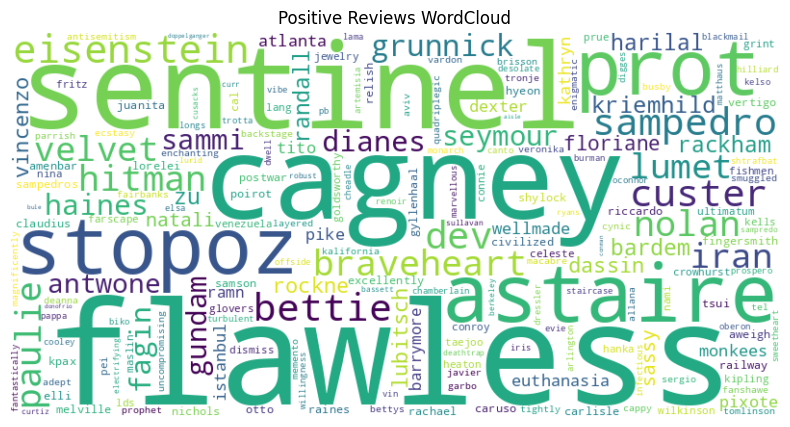

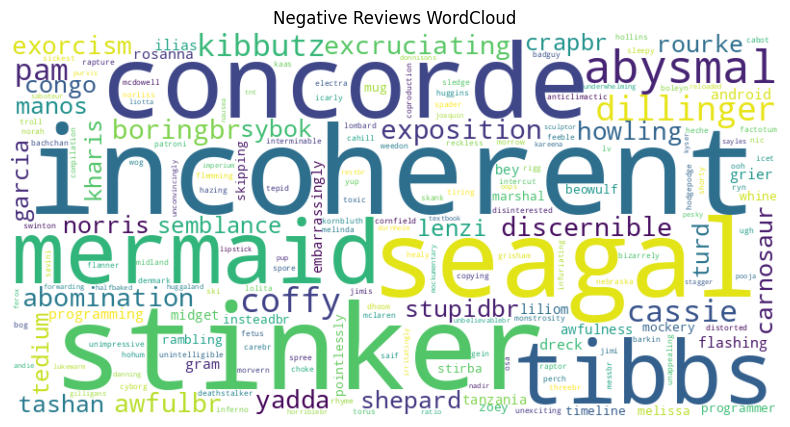

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# wordcloud 객체 생성 # generate_from_frequencies: unique_positive_words딕셔너리에서 단어 빈도수를 기반으로 wordcloud 생성
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(unique_positive_words) 
plt.figure(figsize=(10, 5))                                 # 시각화할 그림의 크기 설정 (가로, 세로)
plt.imshow(positive_wordcloud, interpolation='bilinear')    # 워드클라우드를 이미지로 표시, interpolation: 이미지 보간법 설정
plt.axis('off')                                             # x, y축 숫자 표시 여부 설정                     
plt.title('Positive Reviews WordCloud')
plt.savefig('positive_reviews_wordcloud.jpg')
plt.show()                                                  # 그림 출력

negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(unique_negative_words)
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews WordCloud')
plt.savefig('negative_reviews_wordcloud.jpg')
plt.show()


- NLTK (Natural Language Toolkit)라이브러리를 사용해 입력 텍스트의 감정 점수를 계산해서
- 긍정 점수 > 부정 점수이면 1을, 그렇지 않으면 0을 반환하는 함수 vader_polarity 정의

In [ ]:
import nltk
nltk.download('vader_lexicon')                              # VADER(Valence Aware Dictionary and sEntiment Reasoner) 감정 사전 다운로드 (감정 분석에 사용되는 단어와 그 감정 점수를 포함함)
from nltk.sentiment.vader import SentimentIntensityAnalyzer # SentimentIntensityAnalyzer 클래스 불러옴: 텍스트의 감정점수 계산

# Using SentimentIntensityAnalyzer, get the score of each sentiment for the input text
# return 1 postivie score > negative score,  else 0
def vader_polarity(text):
    analyzer = SentimentIntensityAnalyzer() # SentimentIntensityAnalyzer 객체 생성
    scores = analyzer.polarity_scores(text) # text의 감정 점수 계산
    if scores['pos'] > scores['neg']:
      return 1
    else:
      return 0


# Print true sentiment
# Print predicted sentiment score of each document
# Print predicted label

true_sentiment = 1
predicted_sentiment_score = vader_polarity("Your text here")
predicted_label = "Positive" if predicted_sentiment_score == 1 else "Negative"

print("True Sentiment:", true_sentiment)
print("Predicted Sentiment Score:", predicted_sentiment_score)
print("Predicted Label:", predicted_label)

########################


True Sentiment: 1
Predicted Sentiment Score: 0
Predicted Label: Negative


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
